Benchmark on small dataset

In [9]:
from CSE185_tSNE import *

In [8]:
def read_data(infile):
    df = pd.read_table(infile)  
    ctype = list(df['type'])     
    df  = df.drop('type', axis=1) 
    X   = np.log2( 1 + df.values)  
    M,N = X.shape
    return X, ctype, M, N

In [10]:
Color = [ 'xkcd:red',    'xkcd:green',  'xkcd:yellow',  'xkcd:blue',
          'xkcd:orange', 'xkcd:purple', 'xkcd:cyan',    'xkcd:magenta',
          'xkcd:lime',   'xkcd:pink',   'xkcd:teal',    'xkcd:lavender',
          'xkcd:brown',  'xkcd:maroon', 'xkcd:olive',   'xkcd:navy' ]

In [12]:
X,  C,  M,  N  = read_data("small.txt")


In [15]:
%time Y = pca.run_pca(X)

minus!
dot!
eig!
dot!
CPU times: user 6.16 ms, sys: 3.23 ms, total: 9.38 ms
Wall time: 6.56 ms


/opt/conda/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


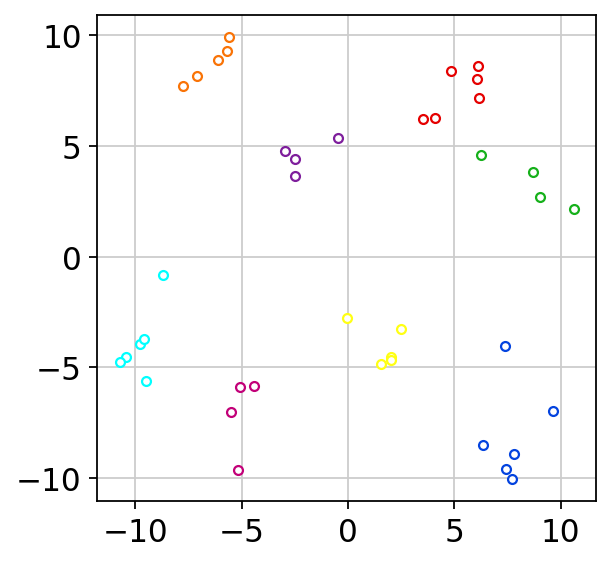

In [16]:
for i in range(M):
    plt.plot(Y[i,0], Y[i,1], 'o', markersize=4, mfc='w', mec=Color[C[i]%16])
plt.show()

In [17]:
import numpy as np
from sklearn.decomposition import PCA

In [20]:
pca = PCA()

CPU times: user 3.19 ms, sys: 0 ns, total: 3.19 ms
Wall time: 2.84 ms


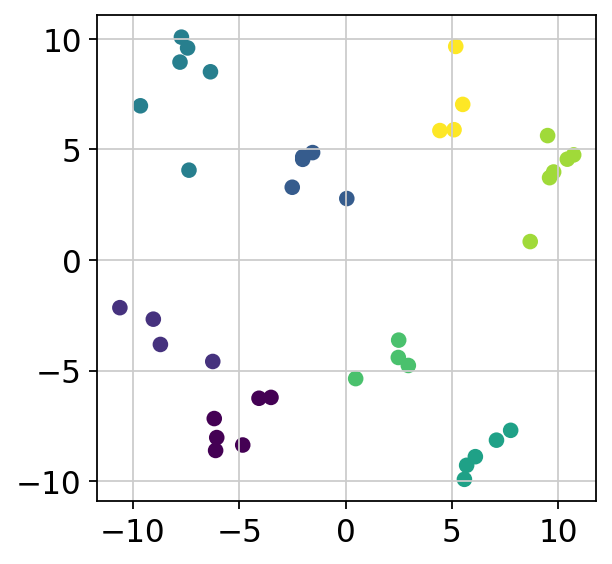

In [23]:
%time Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=C)
plt.show()

minus!
dot!
eig!
dot!
begin calc P
begin calc D
after calc D
begin calc sigma
after calc sigma
begin cal pji
after cal pji
after calc P
True
1857
0.05161834541971099


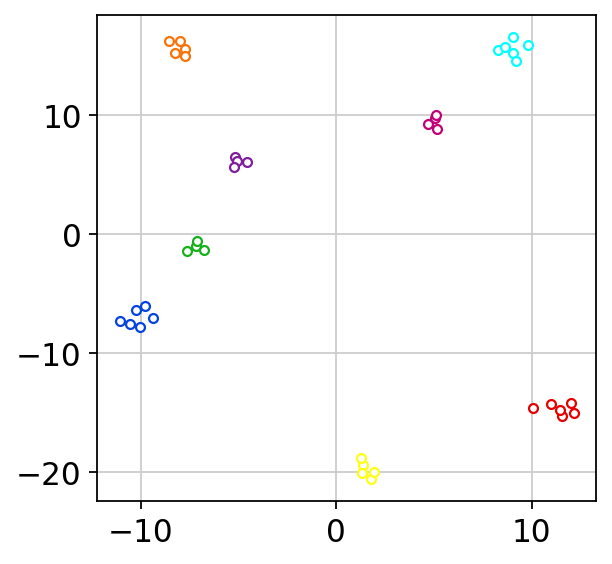

CPU times: user 16min 36s, sys: 28min 13s, total: 44min 49s
Wall time: 5min 40s


In [29]:
%time tSNE.small_tsne("small.txt")


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

CPU times: user 1.86 s, sys: 564 ms, total: 2.42 s
Wall time: 306 ms


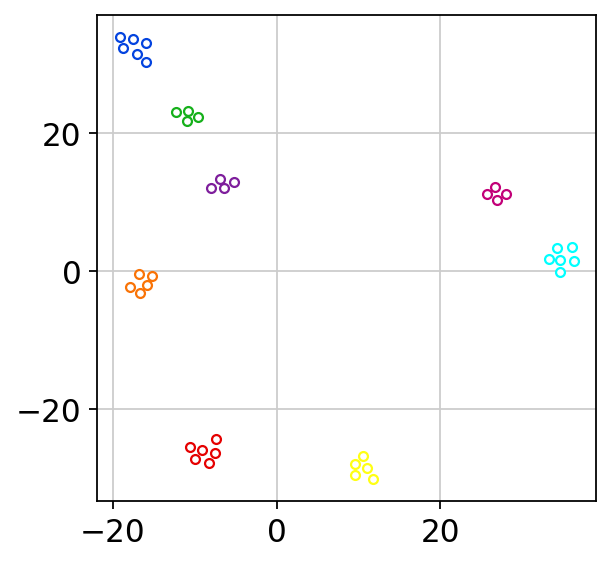

In [27]:
%time Y = TSNE(perplexity=5).fit_transform(X) 
for i in range(Y.shape[0]):
    plt.plot(Y[i,0], Y[i,1], 'o', markersize=4, mfc='w',mec=Color[int(C[i])])
plt.show()

Benchmark on large dataset

In [1]:
from CSE185_tSNE import *

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import os

sc.settings.verbosity = 3            
sc.settings.set_figure_params(dpi=80, facecolor='white')

import matplotlib.pyplot as plt
import scipy
import math                        
from scipy.special import logsumexp


ds = "GSM5114461_S6_A11"
adata = sc.read_10x_mtx(path="./large_test",prefix=ds+"_", cache=True)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)

... reading from cache file cache/large_test-GSM5114461_S6_A11_matrix.h5ad
filtered out 198 cells that have less than 200 genes expressed
filtered out 4965 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/opt/conda/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [3]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata)
sc.tl.umap(adata)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:11)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:17)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


computing PCA
    with n_comps=50
    finished (0:00:14)
CPU times: user 38.3 s, sys: 1min 15s, total: 1min 53s
Wall time: 14.5 s


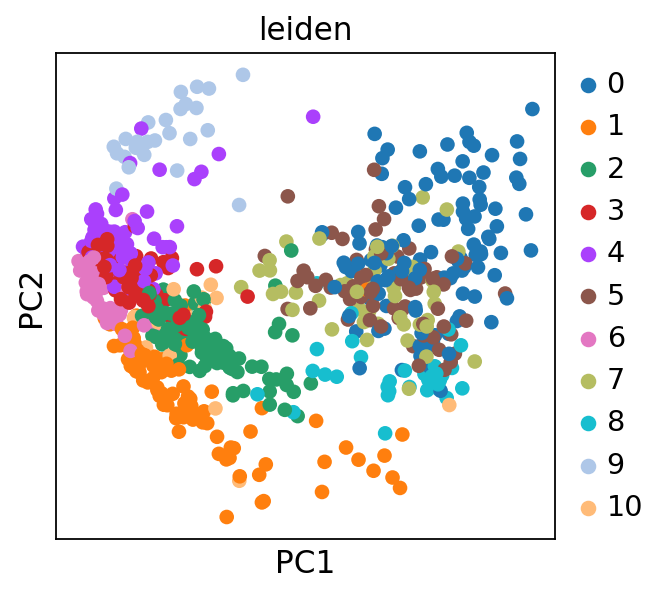

In [5]:
%time sc.pp.pca(adata)
sc.pl.pca(adata,color="leiden")

In [6]:
X = pd.DataFrame(adata.X)
%time X2  = pca.run_pca(X)
v = X2.astype(np.float32)

minus!
dot!
eig!
dot!
CPU times: user 40.5 s, sys: 40.4 s, total: 1min 20s
Wall time: 13.8 s


/tmp/ipykernel_305/1273997556.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  v = X2.astype(np.float32)


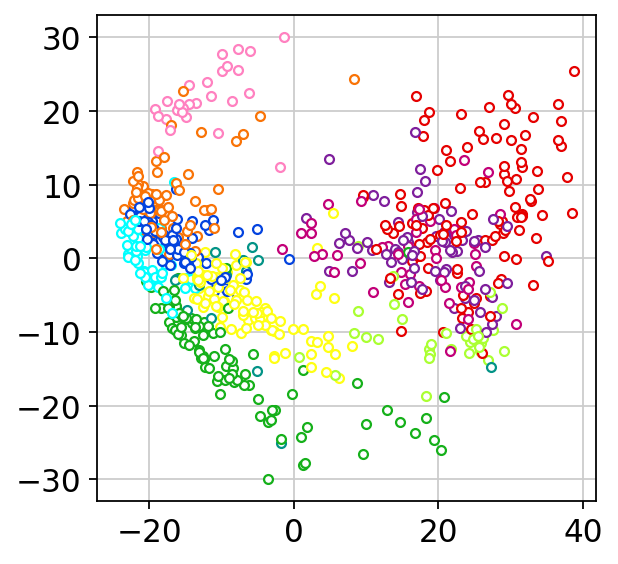

In [7]:
c = adata.obs.leiden
Color = [ 'xkcd:red',    'xkcd:green',  'xkcd:yellow',  'xkcd:blue',
          'xkcd:orange', 'xkcd:purple', 'xkcd:cyan',    'xkcd:magenta',
          'xkcd:lime',   'xkcd:pink',   'xkcd:teal',    'xkcd:lavender',
          'xkcd:brown',  'xkcd:maroon', 'xkcd:olive',   'xkcd:navy' ]
for i in range(X.shape[0]):
    plt.plot(v[i,0], v[i,1], 'o', markersize=4, mfc='w',mec=Color[int(c[i])])
plt.show()

begin calc P
begin calc D
after calc D
begin calc sigma
after calc sigma
begin cal pji
after cal pji
after calc P
True
0


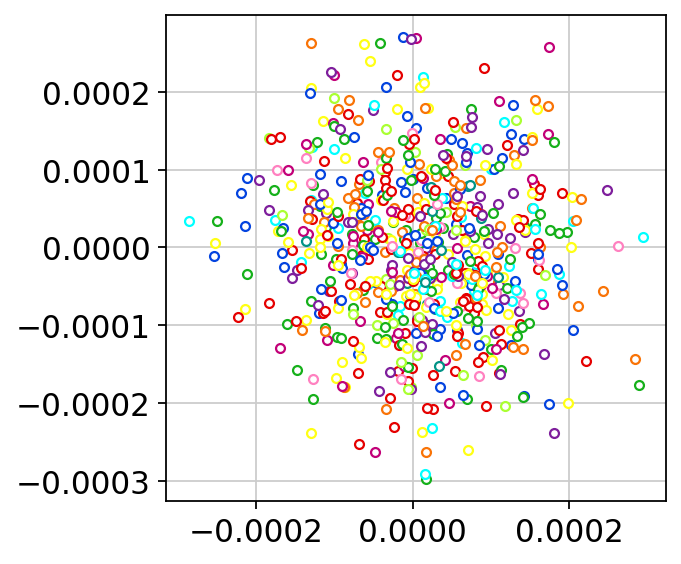

CPU times: user 1min 5s, sys: 257 ms, total: 1min 5s
Wall time: 1min 5s


In [31]:
%time tSNE.large_tsne(v,c)

CPU times: user 9.31 s, sys: 579 ms, total: 9.89 s
Wall time: 1.22 s


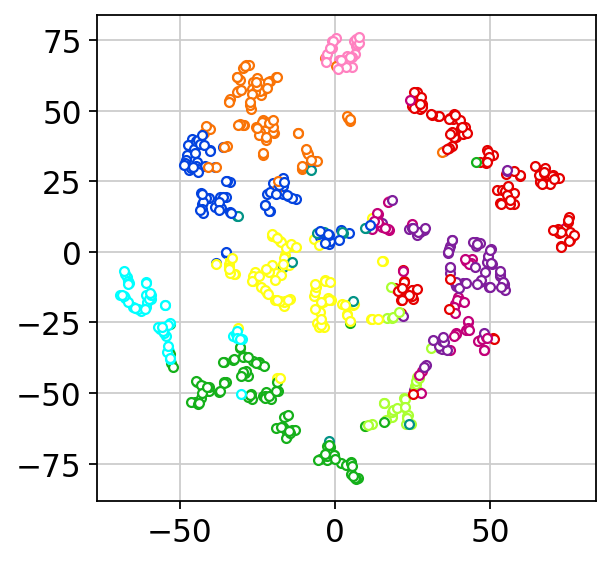

In [32]:
%time Y = TSNE(perplexity=5).fit_transform(v) 
for i in range(Y.shape[0]):
    plt.plot(Y[i,0], Y[i,1], 'o', markersize=4, mfc='w',mec=Color[int(c[i])])
plt.show()

In [34]:
adata.X.shape

(694, 15656)